In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv(r"diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 1. Exploratory Data Analysis

In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().values.any()

False

(array([300., 157.,  92.,  86.,  52.,  34.,  26.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

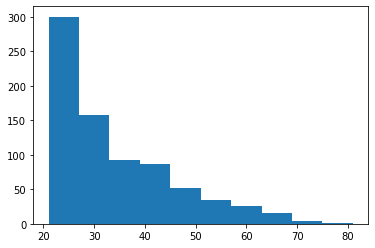

In [5]:
plt.hist(df['Age'])

## 1.1 Converting outcome variable to categorical

In [6]:
df['Outcome'] = df['Outcome'].astype('category')
df.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

In [7]:
df.describe()[1:].T.style.background_gradient()

,mean,std,min,25%,50%,75%,max
Pregnancies,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000


## 1.2 Checking the correlation between the variables

<AxesSubplot:>

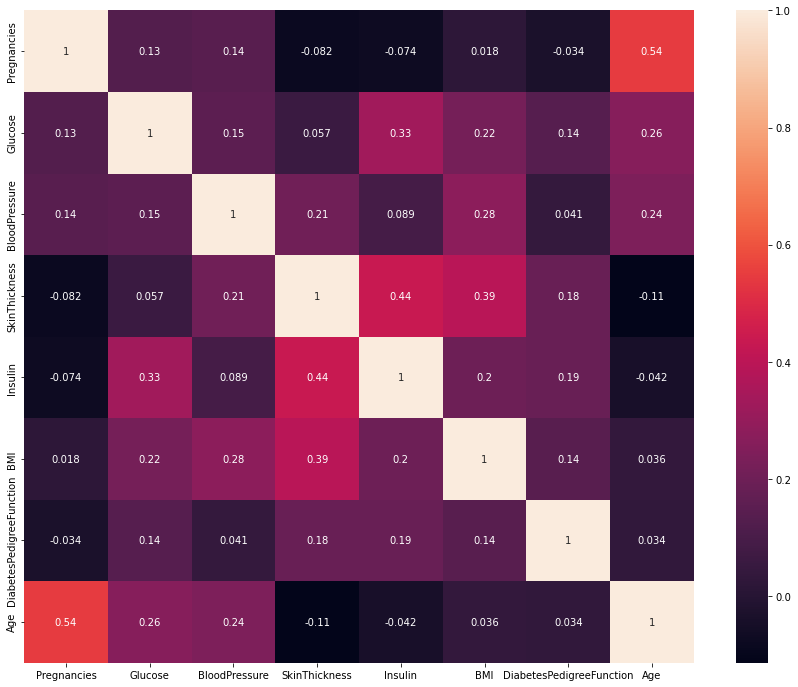

In [8]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

## 1.2 Checking 0s in predictor columns

In [9]:
##Calculating 0s in Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age
print('Os in Glucose is:', sum(df['Glucose'] == 0))
print('Os in BloodPressure is:', sum(df['BloodPressure'] == 0))
print('Os in Skin Thickness is:', sum(df['SkinThickness'] == 0))     
print('Os in Insulin is:', sum(df['Insulin'] == 0)) 
print('Os in BMI is:', sum(df['BMI'] == 0)) 
print('Os in DiabetesPedigreeFunction is:', sum(df['DiabetesPedigreeFunction'] == 0)) 
print('Os in Age is:', sum(df['Age'] == 0)) 

Os in Glucose is: 5
Os in BloodPressure is: 35
Os in Skin Thickness is: 227
Os in Insulin is: 374
Os in BMI is: 11
Os in DiabetesPedigreeFunction is: 0
Os in Age is: 0


## 1.3 Checking the distribution of various columns

This is done to assess what kind of imputations can be done for 0s.

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

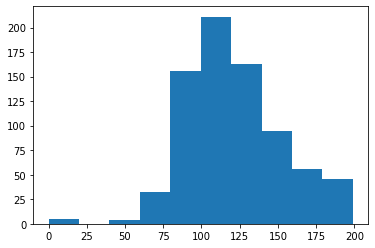

In [10]:
plt.hist(df['Glucose'])

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

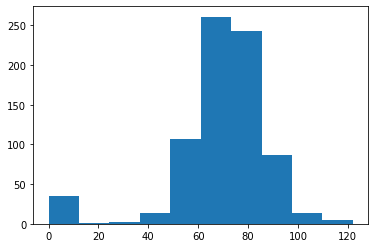

In [11]:
plt.hist(df['BloodPressure'])

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

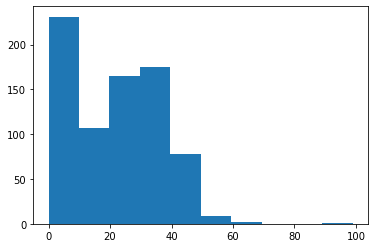

In [12]:
plt.hist(df['SkinThickness'])

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

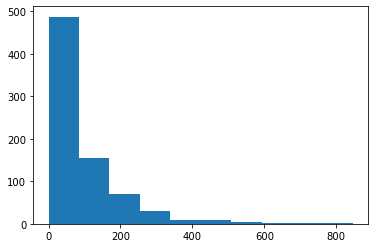

In [13]:
plt.hist(df['Insulin'])

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

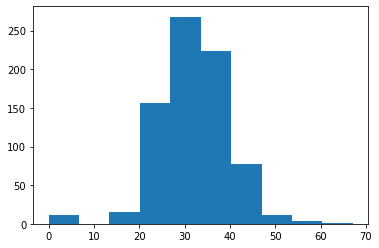

In [14]:
plt.hist(df['BMI'])

# 2. Data Pre Processing

## 2.1 Missing value imputation

Using KNN imputer to replace 0s with mean value from n_neighbors nearest neighbors

In [15]:
from sklearn.impute import KNNImputer
for i in [ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
    df[i]=df[i].replace(0,np.nan)


imputer = KNNImputer()
# fit on the dataset
imputer.fit(df)
# transform the dataset
Xtrans = imputer.transform(df)

In [16]:
df = pd.DataFrame(Xtrans, columns=df.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [17]:
####Incase of outliers we will impute 0 with medians else with mean
#df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
#df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
#df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())
#df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
#df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [18]:
##Calculating 0s in Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age
print('Os in Glucose is:', sum(df['Glucose'] == 0))
print('Os in BloodPressure is:', sum(df['BloodPressure'] == 0))
print('Os in Skin Thickness is:', sum(df['SkinThickness'] == 0))     
print('Os in Insulin is:', sum(df['Insulin'] == 0)) 
print('Os in BMI is:', sum(df['BMI'] == 0)) 
print('Os in DiabetesPedigreeFunction is:', sum(df['DiabetesPedigreeFunction'] == 0)) 
print('Os in Age is:', sum(df['Age'] == 0)) 

Os in Glucose is: 0
Os in BloodPressure is: 0
Os in Skin Thickness is: 0
Os in Insulin is: 0
Os in BMI is: 0
Os in DiabetesPedigreeFunction is: 0
Os in Age is: 0


## 2.1 Oversampling to balance the dataset

In [19]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
y.value_counts()

1.0    500
0.0    500
Name: Outcome, dtype: int64

## 2.2 Scaling the dataset

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(X),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [21]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.558528,0.686774,-0.104472,0.577458,0.074751,0.097593,0.465566,1.366488
1,-0.919583,-1.321401,-0.613511,-0.090717,-1.019800,-0.952929,-0.400276,-0.284429
2,1.149772,1.802426,-0.783191,-0.447078,0.031128,-1.448175,0.606735,-0.197539
3,-0.919583,-1.193898,-0.613511,-0.758893,-0.668830,-0.727817,-0.977503,-1.153334
4,-1.215205,0.336140,-2.819350,0.577458,0.064837,1.523302,5.676298,-0.110649
...,...,...,...,...,...,...,...,...
995,-1.035010,-0.154443,-0.432513,0.074949,0.037209,0.156907,-0.705376,-0.190094
996,-0.758687,2.132471,-0.660800,0.574536,5.151811,-0.394996,-0.662609,1.864755
997,0.073339,-0.307950,-0.013162,-0.562531,0.296532,-0.642753,-0.215493,1.065685
998,0.480595,0.240513,-0.274151,-0.751553,-0.315570,0.303438,0.198912,-0.492570


# 3. Model Development

## 3.1 Test and Train Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [23]:
model_comparison = {}

## 3.2 DecisionTreeClassifier

In [24]:
parameters = {'max_depth': [1,2,3,4,5,6,7]}

Tree_model = DecisionTreeClassifier()

clf = GridSearchCV(Tree_model, parameters)
print("Searching for best hyperparameters ...")
clf.fit(X_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(X_test)
model_comparison['DecisionTreeClassifier'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1))

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 5}


              precision    recall  f1-score   support

         0.0       0.85      0.71      0.77       100
         1.0       0.75      0.87      0.81       100

    accuracy                           0.79       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200



### 3.2.1 Confusion Matrix

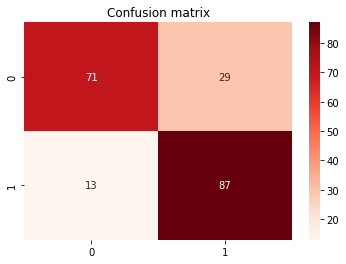

In [25]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap="Reds",fmt='g')
plt.title('Confusion matrix', y=1)
plt.show()

### 3.2.2 Cross Validation

In [26]:
scores = cross_validate(Tree_model, X_train, y_train, scoring=['precision', 'recall', 'f1', 'accuracy'], cv=5)
df_scores = pd.DataFrame(scores, index=range(1, 6))
model_comparison['DecisionTreeClassifier'] = df_scores.mean()[2:]
model_comparison['DecisionTreeClassifier']

test_precision    0.750586
test_recall       0.710000
test_f1           0.727196
test_accuracy     0.736250
dtype: float64

### 3.2.3 ROC AUC Curve

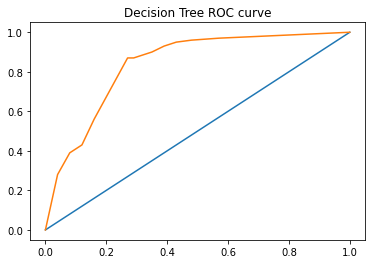

In [27]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='Decision Tree')
plt.title('Decision Tree ROC curve')
plt.show()


In [28]:
roc_auc_score(y_test,y_pred_proba)

0.8367

## 3.3 K Nearest Neighbors 

In [29]:
parameters = {'n_neighbors': [20,30,40,50,60]}

K_model = KNeighborsClassifier()

clf = GridSearchCV(K_model, parameters)
print("Searching for best hyperparameters ...")
clf.fit(X_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(X_test)
model_comparison['KNeighborsClassifier'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1))

Searching for best hyperparameters ...
Best Hyperparameters: {'n_neighbors': 20}


              precision    recall  f1-score   support

         0.0       0.82      0.66      0.73       100
         1.0       0.72      0.86      0.78       100

    accuracy                           0.76       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.76      0.76       200



### 3.3.1 Confusion Matrix

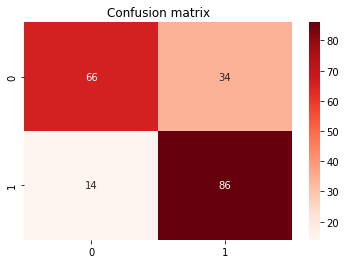

In [30]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap="Reds",fmt='g')
plt.title('Confusion matrix', y=1)
plt.show()

### 3.3.2 Cross Validation

In [31]:
scores = cross_validate(K_model, X_train, y_train, scoring=['precision', 'recall', 'f1', 'accuracy'], cv=5)
df_scores = pd.DataFrame(scores, index=range(1, 6))
model_comparison['KNeighborsClassifier'] = df_scores.mean()[2:]
model_comparison['KNeighborsClassifier']

test_precision    0.746381
test_recall       0.842500
test_f1           0.791082
test_accuracy     0.777500
dtype: float64

### 3.3.3 ROC AUC Curve

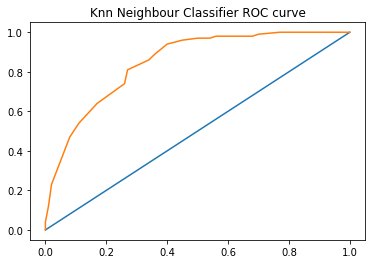

In [32]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.title('Knn Neighbour Classifier ROC curve')
plt.show()


In [33]:
roc_auc_score(y_test,y_pred_proba)

0.8475

## 3.4 Random Forest

In [34]:
parameters = {'n_estimators': [160,180,200], 'max_depth':[18,20,22]}

rf = RandomForestClassifier()

clf = GridSearchCV(rf, parameters)
print("Searching for best hyperparameters ...")
clf.fit(X_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 22, 'n_estimators': 160}
              precision    recall  f1-score   support

         0.0       0.84      0.74      0.79       100
         1.0       0.77      0.86      0.81       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



### 3.4.1 Confusion Matrix

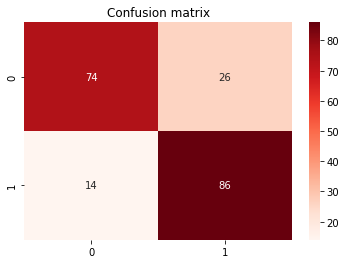

In [35]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap="Reds",fmt='g')
plt.title('Confusion matrix', y=1)
plt.show()

### 3.4.1 Cross Validation

In [36]:
scores = cross_validate(rf, X_train, y_train, scoring=['precision', 'recall', 'f1', 'accuracy'], cv=5)
df_scores = pd.DataFrame(scores, index=range(1, 6))
model_comparison['RandomForestClassifier'] = df_scores.mean()[2:]
model_comparison['RandomForestClassifier']

test_precision    0.803221
test_recall       0.830000
test_f1           0.815405
test_accuracy     0.812500
dtype: float64

### 3.4.2 ROC AUC Curve

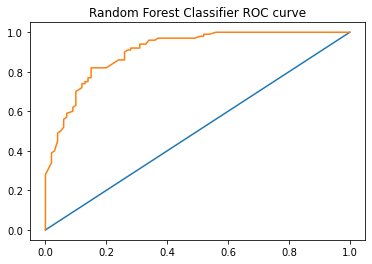

In [37]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.title('Random Forest Classifier ROC curve')
plt.show()

In [38]:
roc_auc_score(y_test,y_pred_proba)

0.90515

# 3. Model Comparision

In [39]:
model_comparison_df = pd.DataFrame.from_dict(model_comparison).T
model_comparison_df = model_comparison_df.sort_values('test_f1', ascending=True)
model_comparison_df

,test_precision,test_recall,test_f1,test_accuracy
DecisionTreeClassifier,0.750586,0.7100,0.727196,0.73625
KNeighborsClassifier,0.746381,0.8425,0.791082,0.77750
RandomForestClassifier,0.803221,0.8300,0.815405,0.81250


# 4. Insights

1. As we compare the three models Random Forest Classifier outperforms Decision Tree and KNN classifier in terms of precision, recall, f1, roc, auc score and accuracy.
2. False Positive means a patient will be falsely reported that he/she has diabetes.
3. False Negative means a patient who is positive remains undiagnosed which can have deadly repurcussions, hence Type II error and False Negative is riskier in this scenario.
4. Since the data was imbalanced, Presicion-Recall/AP Curve is the best metric to compare algorithms.
5. Precision is accuracy of the positive predictions
6. Recall is fraction of the positives correctly identified
7. F1 score takes both Precision and Recall into account.